## Titanic - Machine Learning from Disaster

In this competition from Kaggle, we are asked to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

**Dataset**

In this competition, we’ll gain access to two similar datasets that include passenger information like name, age, gender, socio-economic class, etc.

* **Train.csv** will contain the details of a subset of the passengers on board (891 to be exact) and importantly, will **reveal whether they survived or not**, also known as the “**ground truth**”.

* **Test.csv** dataset contains similar information but does **not disclose the “ground truth”** for each passenger. It’s our job to predict these outcomes.

==> ⚠️ **Therefore, we use the train dataset to train and evaluate our model, and then use the test dataset to generate predictions for submission on Kaggle.**

## Preparing data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic = pd.read_csv("../dataset/train.csv")
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Data Description

| #   | Feature       | Description                                                                 |
|-----|---------------|-----------------------------------------------------------------------------|
| 0   | `PassengerId` | A unique identifier for each passenger                                      |
| 1   | `Survived`    | Whether survived or not (`0` = No, `1` = Yes)                               |
| 2   | `Pclass`      | Ticket class (`1` = 1st, `2` = 2nd, `3` = 3rd)                               |
| 3   | `Name`        | Name of the passenger                                                       |
| 4   | `Sex`         | Gender                                                                      |
| 5   | `Age`         | Age in years                                                                |
| 6   | `SibSp`       | Number of siblings/spouses aboard the Titanic                              |
| 7   | `Parch`       | Number of parents/children aboard the Titanic                              |
| 8   | `Ticket`      | Ticket number                                                               |
| 9  | `Fare`        | Passenger fare (e.g., `7.25` means the passenger paid 7.25 to board)        |
| 10  | `Cabin`       | Cabin number                                                                |
| 11  | `Embarked`    | Port of Embarkation (`C` = Cherbourg, `Q` = Queenstown, `S` = Southampton)  |

---

Key Takeaways

- `Survived` is the **target variable** (`0` = No, `1` = Yes)

### Data Validation and Checks

1) Check Missing Values

2) Check Duplicates
   
3) Check Data Type

4) Check the Number of Unique Values in Each Column
   
5) Numerical columns
   
6) Categorical Columns
    
7) Check Data Imbalance (for Target Variable, for Classification problem)

#### 1) Check Missing Values

In [4]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64



* The Cabin feature has the most missing values (while most other features do not contain missing data) — it is likely that passengers with a cabin belong to the higher class, while others do not have a cabin.--> maybe add columns **hasCabin**
* Age has 177 missing values, and Embarked has 2 missing values.


C:\Users\LQB464\AppData\Local\Temp\ipykernel_10132\536210118.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic["Age"].dropna())


<Axes: xlabel='Age', ylabel='Density'>

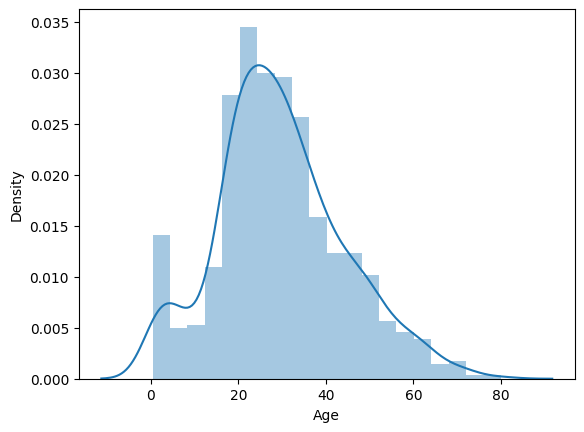

In [5]:
sns.distplot(titanic["Age"].dropna())

Looks like the distribution of ages is slightly skewed right. Because of this, we can **fill in the null values with the median** for the most accuracy.

**Note**: We do not want to fill with the mean because the skewed distribution means that very large values on one end will greatly impact the mean, as opposed to the median, which will only be slightly impacted.

#### 2) Check Duplicates

In [6]:
duplicates = titanic[titanic.duplicated(keep=False)]

# Display all duplicate rows
print(f"Number of duplicate rows (including all occurrences): {len(duplicates)}")
print(duplicates)

Number of duplicate rows (including all occurrences): 0
Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []


=> Data not contain duplicate rows

#### 3) Check Data Type

In [7]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Age has data type float64 --> need to convert to int64

In [8]:
for col in titanic.columns:
    print(f"{col}: {titanic[col].apply(type).nunique()} unique types")

PassengerId: 1 unique types
Survived: 1 unique types
Pclass: 1 unique types
Name: 1 unique types
Sex: 1 unique types
Age: 1 unique types
SibSp: 1 unique types
Parch: 1 unique types
Ticket: 1 unique types
Fare: 1 unique types
Cabin: 2 unique types
Embarked: 2 unique types


Most columns contain 1 data type (there are no unexpected data types in any columns). Cabin, Embarked have 2 (due to missing data).

In [9]:
# Identify Columns with Constant Values:
for col in titanic.select_dtypes(exclude=['object']):
    if titanic[col].nunique() == 1:
        print(f"Column '{col}' has a single unique value.")
    else:
        print(f"Column '{col}' has {titanic[col].nunique()} unique values.")


Column 'PassengerId' has 891 unique values.
Column 'Survived' has 2 unique values.
Column 'Pclass' has 3 unique values.
Column 'Age' has 88 unique values.
Column 'SibSp' has 7 unique values.
Column 'Parch' has 7 unique values.
Column 'Fare' has 248 unique values.


All columns are continuous numeric data with no constant values.


#### 4) Check the Number of Unique Values in Each Column

In [10]:
titanic.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

* Title: Each person has a different name → not directly useful. Can extract **Title** (Mr, Mrs, Dr, ...) for use
* Fare: Continuous data → reflects wealth/poverty. Can create groups (**FareBin**)
* Cabin: Many missing values. Extracting **HasCabin** might be useful
* Ticket: May be duplicated but has many unique values. Should not be used directly. Can create **TicketGroupSize**, **TicketPrefix**
* Age: Continuous, good for modeling. Can additionally create **AgeBin** for grouping


#### 5) Numerical columns

In [11]:
titanic.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [12]:
correlation_with_target = titanic.corr(numeric_only=True)['Survived'].drop('Survived')
print(correlation_with_target)

PassengerId   -0.005007
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64


In [13]:
numerical_data = titanic.select_dtypes(include='number')
#append the features of numerical_data to list
numerical_features=numerical_data.columns.tolist()

print(f'There are {len(numerical_features)} numerical features:', '\n')
print(numerical_features)

There are 7 numerical features: 

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [14]:
numerical_data.var()

PassengerId    66231.000000
Survived           0.236772
Pclass             0.699015
Age              211.019125
SibSp              1.216043
Parch              0.649728
Fare            2469.436846
dtype: float64

In [15]:
numerical_data.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.389108
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64

* SibSp, Parch, Fare has high positive skew (2.7 - 4.8) ==> Standardize or Log
* Other features shows moderate skew

#### 6) Categorical Columns

In [16]:
categorical_data = titanic.select_dtypes(include='object')
#append the features of categorical_data to list
categorical_features=categorical_data.columns.tolist()

print(f'There are {len(categorical_features)} categorical features:', '\n')
print(categorical_features)

There are 5 categorical features: 

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [17]:
for col in titanic.select_dtypes(include='object'):
    print(f"Number of unique values in column '{col}': {titanic[col].nunique()}")


Number of unique values in column 'Name': 891
Number of unique values in column 'Sex': 2
Number of unique values in column 'Ticket': 681
Number of unique values in column 'Cabin': 147
Number of unique values in column 'Embarked': 3


With feature Sex, Embarked; we need to Encode OneHot to these features

#### 7) Check imbalance for target, classification data

Class Distribution (%):
Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64


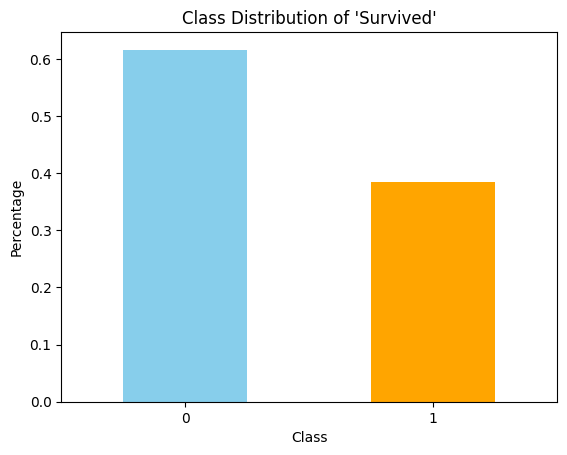

In [18]:
# Check class distribution
class_distribution = titanic['Survived'].value_counts(normalize=True)

# Display the distribution as percentages
print("Class Distribution (%):")
print(class_distribution * 100)

class_distribution.plot(kind='bar', color=['skyblue', 'orange'])
plt.title("Class Distribution of 'Survived'")
plt.xlabel("Class")
plt.ylabel("Percentage")
plt.xticks(rotation=0)
plt.show()

### Investigate Reasonable Cleaning Method

In [19]:
# Age
titanic_copy = titanic.copy()
titanic_copy['Sex_integer'] = titanic_copy['Sex'].map({'male': 0, 'female': 1})

from statsmodels.stats.multicomp import pairwise_tukeyhsd
# Ta kiểm định Age với từng nhóm Pclass có khác nhau đôi một không
data = titanic.dropna(subset=['Age', 'Pclass'])
tukey = pairwise_tukeyhsd(endog=data['Age'], groups=data['Pclass'], alpha=0.05)
# Nếu reject = True, Age ở hai nhóm được xét có sự khác nhau
print(tukey)

# Ta kiểm định Age với từng nhóm Sex_integer có khác nhau đôi một không
data = titanic_copy.dropna(subset=['Age', 'Sex_integer'])
tukey = pairwise_tukeyhsd(endog=data['Age'], groups=data['Sex_integer'], alpha=0.05)
# Nếu reject = True, Age ở hai nhóm được xét có sự khác nhau
print(tukey)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
     1      2  -8.3558    0.0 -11.7041  -5.0075   True
     1      3 -13.0928    0.0 -15.9622 -10.2234   True
     2      3   -4.737 0.0005  -7.6763  -1.7977   True
------------------------------------------------------
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1  -2.8109 0.0127 -5.0191 -0.6027   True
----------------------------------------------------


Remarks:

* Age differs slightly across the three Pclass groups: 1, 2, and 3
* Age also differs between the two Sex\_integer groups: 0 (male) and 1 (female)
* Therefore, we choose to fill missing values in Age using a representative value (Median) for each combination of Pclass and Sex\_integer (as shown in the table below)



In [20]:
titanic_copy[titanic_copy['Age'].notna()].groupby(['Pclass','Sex'])['Age'].median()

Pclass  Sex   
1       female    35.0
        male      40.0
2       female    28.0
        male      30.0
3       female    21.5
        male      25.0
Name: Age, dtype: float64

 **Remark Cleaning**
* fill null in Age = median()
* fill null in Embarked = most frequent
* Age: round float value = round() → then convert Age column to Int


## Split train/test



In [21]:
from sklearn.model_selection import train_test_split

strat_train_set, strat_test_set = train_test_split(
    titanic, test_size=0.2, stratify=titanic[["Survived", "Sex", "Pclass"]], random_state=42
)

After splitting into Train and Test sets, we recheck the correlation and distribution of the Train set to ensure it is not biased compared to the original dataset (before Train/Test split).


### Check Correlation & Distribution of dataset train

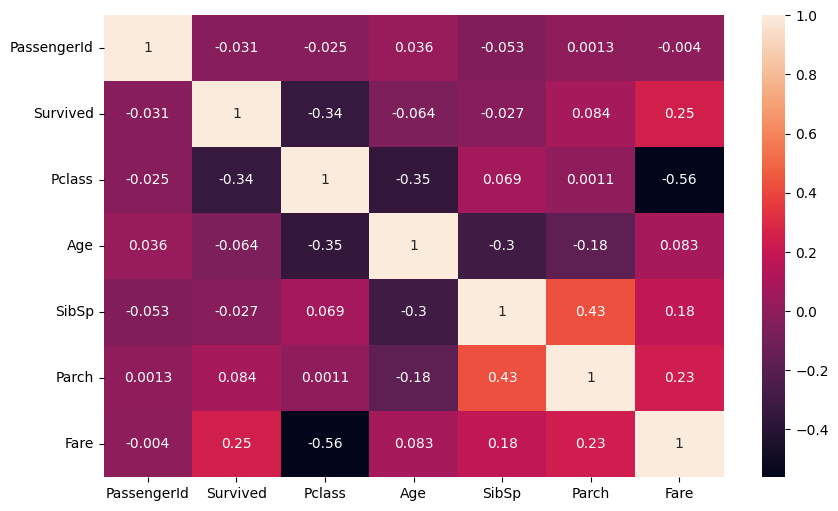

In [22]:
# Correlation
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(strat_train_set.corr(numeric_only = True), ax=ax, annot=True)
plt.show()

**Remarks**
- **Pclass and Fare**: strong negative correlation (-0.56) → higher class (lower Pclass value) tends to have more expensive tickets.
- **Survived and Fare**: positive correlation (0.25) → passengers who paid higher fares had a higher survival rate.
- **Survived and Pclass**: negative correlation (-0.34) → passengers in higher classes were more likely to survive.
- **SibSp and Parch**: moderately strong positive correlation (0.43) → passengers traveling with siblings/spouses were also likely traveling with parents/children.
- **Fare and Parch/SibSp**: moderate positive correlation (0.23 and 0.18) → traveling with a large family is associated with higher fare.

➡️ **Age and Survived**: very weak correlation (−0.064) → age may not have a strong linear relationship with survival.  
➡️ **PassengerId**: not correlated with any variable → can be dropped from modeling.


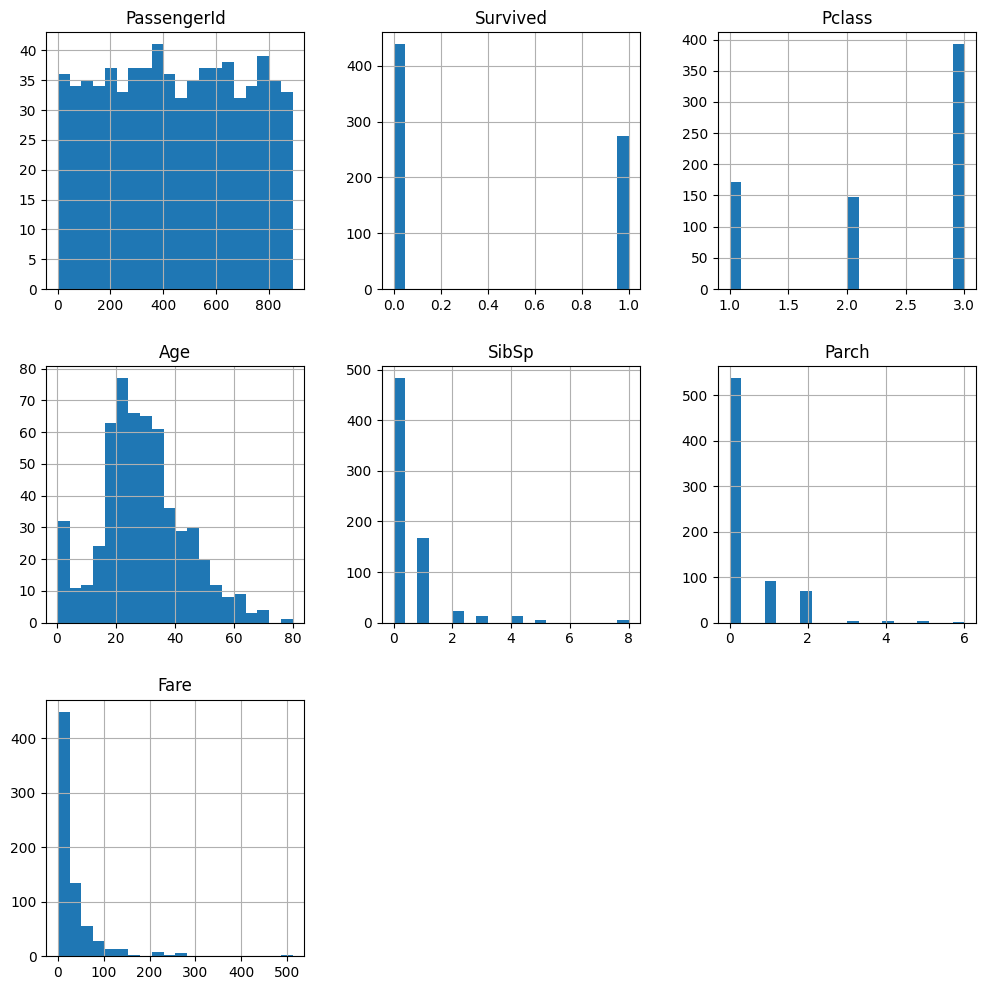

In [23]:
# Distribution
strat_train_set.hist(figsize=(12,12),bins=20)
plt.show()

* **Age**: Right-skewed distribution, with most passengers aged between 20–40.

* **SibSp & Parch**: Most passengers traveled alone (value 0 is dominant).

* **Fare**: Strongly right-skewed distribution, with a few passengers paying very high fares → consider normalization or categorization.

## Experiment with New Attribute

In [24]:
trainset_copy = strat_train_set.copy()
# Embarked
trainset_copy['Embarked'].value_counts()
trainset_copy['Embarked'] = trainset_copy['Embarked'].fillna('S')

In [25]:
# Title
trainset_copy['Title'] = trainset_copy['Name'].str.split(",",expand=True)[1].str.split(".",expand=True)[0]
trainset_copy['Title'] = trainset_copy['Title'].str.strip()
trainset_copy['Title'].value_counts()

Title
Mr              412
Miss            138
Mrs             105
Master           34
Dr                7
Rev               5
Mlle              2
Don               1
Sir               1
the Countess      1
Capt              1
Ms                1
Lady              1
Jonkheer          1
Col               1
Mme               1
Name: count, dtype: int64

In [26]:
trainset_copy['Title_Bucketized'] = trainset_copy['Title']
trainset_copy['Title_Bucketized'] = trainset_copy['Title_Bucketized'].replace({'Rev': 'Others','Col': 'Others','Major': 'Others',
                                            'Don': 'Others','Lady': 'Others','Capt': 'Others',
                                            'the Countess': 'Others','Jonkheer': 'Others'})
trainset_copy['Title_Bucketized'] = trainset_copy['Title_Bucketized'].replace({'Dr': 'Mr','Sir':'Mr'})
trainset_copy['Title_Bucketized'] = trainset_copy['Title_Bucketized'].replace({'Mlle': 'Miss','Ms': 'Miss'})

trainset_copy['Title_Bucketized'] = trainset_copy['Title_Bucketized'].replace({'Mme': 'Mrs'})
print(trainset_copy['Title_Bucketized'].value_counts())
print(trainset_copy[trainset_copy.Survived==1].groupby('Title_Bucketized').size()/trainset_copy.groupby('Title_Bucketized').size())

Title_Bucketized
Mr        420
Miss      141
Mrs       106
Master     34
Others     11
Name: count, dtype: int64
Title_Bucketized
Master    0.558824
Miss      0.695035
Mr        0.164286
Mrs       0.801887
Others    0.272727
dtype: float64


**Statistical testing for Title**

In [27]:
from statsmodels.stats.proportion import proportions_ztest

# Hàm kiểm định z-test cho 2 nhóm
def survival_proportion_test(data, groupby_column, group1, group2, label):
    survived = data.groupby(groupby_column)['Survived'].sum()
    total = data.groupby(groupby_column)['Survived'].count()
    p = [survived[group1], survived[group2]]
    n = [total[group1], total[group2]]
    stat, pval = proportions_ztest(p, n, alternative='smaller')
    print(f"p-value ({group1} < {group2}) = {pval:.12f}  |  {label}")

# Kiểm định tỉ lệ sống sót 1 phía: H0: Miss >= Mrs; H1: Miss < Mrs
female = trainset_copy[trainset_copy['Sex'] == 'female']
survival_proportion_test(female,'Title', 'Miss', 'Mrs', 'Mrs vs Miss')

# Kiểm định tỉ lệ sống sót 1 phía: H0: Mr >= Master; H1: Mr < Master
male = trainset_copy[trainset_copy['Sex'] == 'male']
survival_proportion_test(male,'Title','Mr', 'Master', 'Mr vs Master')

p-value (Miss < Mrs) = 0.025207751557  |  Mrs vs Miss
p-value (Mr < Master) = 0.000000004497  |  Mr vs Master


**Remarks**:


 * We already know that Female passengers had a higher survival rate than Male passengers.

 * Now we further observe that among Females, Mrs. (married women) had a higher survival rate than Miss (unmarried women); and among Males, Master (young boys) had a higher survival rate than Mr. (adult men).





In [28]:
# FamilySize
# Get Family size from SibSp, Parch
trainset_copy['FamilySize'] = trainset_copy['SibSp'] + trainset_copy['Parch'] + 1
def f(n):
  if n == 1:
    return 'Alone'
  elif n >=2 and n <= 4:
    return 'Medium'
  else:
    return 'Large'

trainset_copy['FamilySize_Bucketized'] = trainset_copy['FamilySize'].apply(f)
print(trainset_copy['FamilySize_Bucketized'].value_counts())
print(trainset_copy[trainset_copy.Survived==1].groupby('FamilySize_Bucketized').size()/trainset_copy.groupby('FamilySize_Bucketized').size())

FamilySize_Bucketized
Alone     426
Medium    233
Large      53
Name: count, dtype: int64
FamilySize_Bucketized
Alone     0.302817
Large     0.188679
Medium    0.579399
dtype: float64


**Statistical testing for FamilySize**

In [29]:
# Kiểm định tỉ lệ sống sót 1 phía: H0: Large >= Alone; H1: Large < Alone
survival_proportion_test(trainset_copy,'FamilySize_Bucketized','Large', 'Alone', 'Large vs Alone')

# Kiểm định tỉ lệ sống sót 1 phía: H0: ALone >= Medium; H1: Alone < Medium
survival_proportion_test(trainset_copy, 'FamilySize_Bucketized', 'Alone', 'Medium', 'Alone vs Medium')

p-value (Large < Alone) = 0.042119460854  |  Large vs Alone
p-value (Alone < Medium) = 0.000000000002  |  Alone vs Medium


Remarks:

* Passengers traveling with **1 to 3** family members had the highest survival rate, followed by those traveling **alone**, while those traveling with **more than 3** companions had the lowest survival rate.

In [30]:
# IsAlone
trainset_copy['IsAlone'] = 0
trainset_copy.loc[trainset_copy['SibSp'] + trainset_copy['Parch'] == 0, 'IsAlone'] = 1
print(trainset_copy['IsAlone'].value_counts())
print(trainset_copy[trainset_copy.Survived==1].groupby('IsAlone').size()/trainset_copy.groupby('IsAlone').size())

IsAlone
1    426
0    286
Name: count, dtype: int64
IsAlone
0    0.506993
1    0.302817
dtype: float64


**Statistical testing for Alone**

In [31]:
# Kiểm định tỉ lệ sống sót 1 phía:
# H0: Survival rate (of IsAlone=1) >= Survival rate (of IsAlone=0);
# H1: Survival rate (of IsAlone=1) < Survival rate (of IsAlone=0)
survival_proportion_test(trainset_copy,'IsAlone',1 , 0, 'Alone vs Not Alone')

p-value (1 < 0) = 0.000000020172  |  Alone vs Not Alone


**Remarks**:
* Passengers traveling **with family members** had a higher survival rate than those **traveling alone**.






In [32]:
# Age_Bucketized
# Fillna Column Age
trainset_copy['Age_filled'] = trainset_copy['Age'].fillna(trainset_copy.groupby(['Pclass','Sex'])['Age'].transform('median'))
trainset_copy['Age_filled'] = trainset_copy['Age_filled'].round().astype(int)

# Create column AgeBin
bins = [-1, 12, 18, 35, 60, 81]
labels = ['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']
trainset_copy['Age_Bucketized'] = pd.cut(trainset_copy['Age_filled'], bins=bins, labels=labels, right=True)

# value counts & correlate with Survived
print(trainset_copy['Age_Bucketized'].value_counts())
print(trainset_copy[trainset_copy.Survived==1].groupby('Age_Bucketized').size()/trainset_copy.groupby('Age_Bucketized').size())

Age_Bucketized
Young Adult    411
Adult          171
Teenager        58
Child           55
Senior          17
Name: count, dtype: int64
Age_Bucketized
Child          0.563636
Teenager       0.396552
Young Adult    0.367397
Adult          0.374269
Senior         0.294118
dtype: float64


C:\Users\LQB464\AppData\Local\Temp\ipykernel_10132\4044917400.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(trainset_copy[trainset_copy.Survived==1].groupby('Age_Bucketized').size()/trainset_copy.groupby('Age_Bucketized').size())
C:\Users\LQB464\AppData\Local\Temp\ipykernel_10132\4044917400.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(trainset_copy[trainset_copy.Survived==1].groupby('Age_Bucketized').size()/trainset_copy.groupby('Age_Bucketized').size())


**Statistical testing for Child**

In [33]:
import pandas as pd
import numpy as np
from itertools import combinations
from scipy.stats import mannwhitneyu
rows = []
order = ['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']
for a, b in combinations(order, 2):
    group_a = trainset_copy[trainset_copy['Age_Bucketized'] == a]['Survived']
    group_b = trainset_copy[trainset_copy['Age_Bucketized'] == b]['Survived']

    # One-sided test: H0: mean(a) <= mean(b), H1: mean(a) > mean(b)
    _ , p_value = mannwhitneyu(group_a, group_b, alternative='greater')
    rows.append({
        'Group A': a,
        'Group B': b,
        'Mean A': group_a.mean(),
        'Mean B': group_b.mean(),
        'p-value (A > B)': p_value
    })

result = pd.DataFrame(rows)
filtered_result = result[(result['p-value (A > B)'] < 0.05) | (result['p-value (A > B)'] > 0.95)]
print(filtered_result.sort_values('p-value (A > B)'))

  Group A      Group B    Mean A    Mean B  p-value (A > B)
1   Child  Young Adult  0.563636  0.367397         0.002572
2   Child        Adult  0.563636  0.374269         0.006795
3   Child       Senior  0.563636  0.294118         0.027347
0   Child     Teenager  0.563636  0.396552         0.038694


**Remarks**:

We have sufficient evidence to believe that **Children** had a higher survival rate than all older age groups — in other words, **Children had the highest survival rate** among all age categories.


In [34]:
# HasCabin
trainset_copy['HasCabin'] = trainset_copy['Cabin'].notnull().astype(int)
print(trainset_copy['HasCabin'].value_counts())
print(trainset_copy[trainset_copy.Survived==1].groupby('HasCabin').size()/trainset_copy.groupby('HasCabin').size())

HasCabin
0    550
1    162
Name: count, dtype: int64
HasCabin
0    0.301818
1    0.666667
dtype: float64


**Statistical testing for HasCabin**

In [35]:
# Kiểm định tỉ lệ sống sót 1 phía:
# H0: Survival rate (of HasCabin=0) >= Survival rate (of HasCabin=1);
# H1: Survival rate (of HasCabin=0) < Survival rate (of HasCabin=1)
survival_proportion_test(trainset_copy,'HasCabin',0 , 1, 'Not Cabin vs Has Cabin')

p-value (0 < 1) = 0.000000000000  |  Not Cabin vs Has Cabin


***Remarks***:
Passengers who had **Cabin** had a higher chance of survival than those who were **not had Cabin**.


In [36]:
# FarePerPassenger
titanic_sort = trainset_copy.sort_values(by='Fare', ascending=False)
titanic_sort[['Pclass','Name','Age','SibSp','Parch','Ticket','Fare','Cabin']].head(10)

,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin
258,1,"Ward, Miss. Anna",35.0,0,0,PC 17755,512.3292,NaN
737,1,"Lesurer, Mr. Gustave J",35.0,0,0,PC 17755,512.3292,B101
27,1,"Fortune, Mr. Charles Alexander",19.0,3,2,19950,263.0000,C23 C25 C27
438,1,"Fortune, Mr. Mark",64.0,1,4,19950,263.0000,C23 C25 C27
341,1,"Fortune, Miss. Alice Elizabeth",24.0,3,2,19950,263.0000,C23 C25 C27
88,1,"Fortune, Miss. Mabel Helen",23.0,3,2,19950,263.0000,C23 C25 C27
311,1,"Ryerson, Miss. Emily Borie",18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66
742,1,"Ryerson, Miss. Susan Parker ""Suzette""",21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66
118,1,"Baxter, Mr. Quigg Edmond",24.0,0,1,PC 17558,247.5208,B58 B60
299,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",50.0,0,1,PC 17558,247.5208,B58 B60


**Remarks:**

We observe that 4 passengers with **Ticket 19950**, in **Pclass 1**, and **Fare = 263** (very high) all share the **surname Fortune** and the same **Cabin**. This strongly suggests that they are family members.

Similarly, 2 passengers with **Ticket PC 17608** share the **surname Ryerson** and **Fare = 262.3750**, and 2 passengers with **Ticket PC 17558** share the **surname Baxter** and **Fare = 247.5**.

➡️ This raises the suspicion that such **very high Fare values might represent the total fare for the entire family**.


In [37]:
trainset_copy = trainset_copy.sort_values(by = 'PassengerId')
highFareAlonePclass1 = len(trainset_copy[(trainset_copy.Fare > 100) & (trainset_copy.SibSp == 0) & (trainset_copy.Parch == 0) & (trainset_copy.Pclass == 1)])
numPclass1 = len(trainset_copy[trainset_copy.Pclass==1])
ratio = highFareAlonePclass1/numPclass1
print(f"Number of highFareAlonePclass1 passengers: {highFareAlonePclass1}")
print(f"Number of Pclass1 passengers: {numPclass1}")
print(f"Ratio: {ratio}")

Number of highFareAlonePclass1 passengers: 13
Number of Pclass1 passengers: 172
Ratio: 0.0755813953488372


**Remarks**:

Most people in Pclass 1 who travel alone have a Fare less than 100 (very low compared to those in the same Pclass 1 traveling with multiple family members). This further supports the idea that the Fare represents the total ticket price for the whole family.

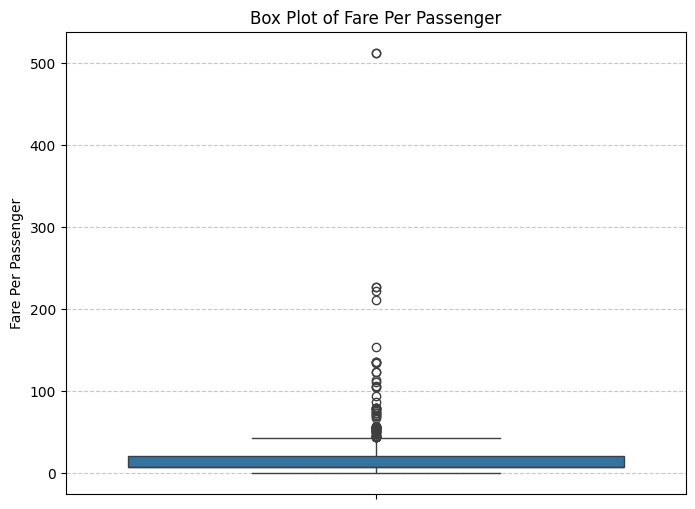

In [38]:
# Tạo cột FarePerPassenger
trainset_copy['FarePerPassenger'] = trainset_copy['Fare'] / (trainset_copy['SibSp'] + trainset_copy['Parch'] + 1)

plt.figure(figsize=(8, 6))
sns.boxplot(y=trainset_copy['FarePerPassenger'])
plt.title('Box Plot of Fare Per Passenger')
plt.ylabel('Fare Per Passenger')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

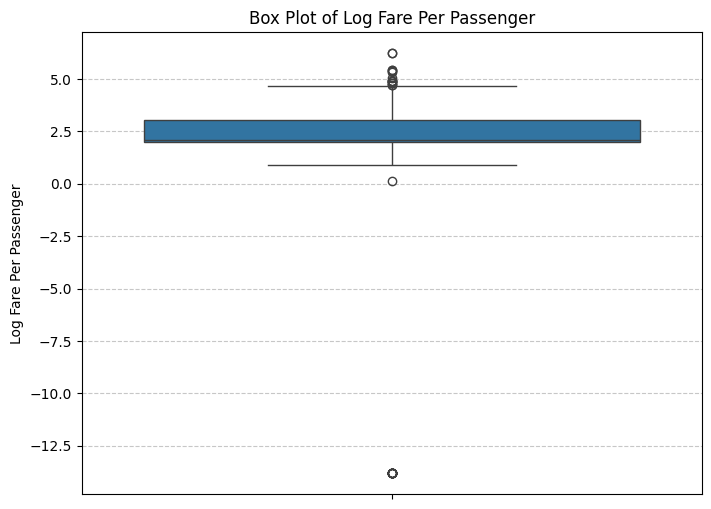

In [39]:
trainset_copy['LogFarePerPassenger'] = np.log(trainset_copy['FarePerPassenger'] + 1e-6)
plt.figure(figsize=(8, 6))
sns.boxplot(y=trainset_copy['LogFarePerPassenger'])
plt.title('Box Plot of Log Fare Per Passenger')
plt.ylabel('Log Fare Per Passenger')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Remarks**:

Pre-processing cần loại Outlier

In [40]:
trainset_copy['LogFarePerPassenger'].describe()

count    712.000000
mean       2.206175
std        2.341322
min      -13.815511
25%        1.981002
50%        2.085672
75%        3.062048
max        6.238967
Name: LogFarePerPassenger, dtype: float64

In [41]:
# LogFare_Bucketized
bins=[-15, 2, 2.5, 3.5, 7]
labels = ['Cheap', 'Mid range', 'Affordable', 'Expensive']
trainset_copy['LogFare_Bucketized'] = pd.cut(trainset_copy['LogFarePerPassenger'], bins=bins, labels=labels, right=True)

# value counts & correlate with Survived
print(trainset_copy['LogFare_Bucketized'].value_counts())
print(trainset_copy[trainset_copy.Survived==1].groupby('LogFare_Bucketized').size()/trainset_copy.groupby('LogFare_Bucketized').size())

LogFare_Bucketized
Mid range     263
Cheap         183
Affordable    171
Expensive      95
Name: count, dtype: int64
LogFare_Bucketized
Cheap         0.262295
Mid range     0.296578
Affordable    0.514620
Expensive     0.631579
dtype: float64


C:\Users\LQB464\AppData\Local\Temp\ipykernel_10132\494104271.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(trainset_copy[trainset_copy.Survived==1].groupby('LogFare_Bucketized').size()/trainset_copy.groupby('LogFare_Bucketized').size())
C:\Users\LQB464\AppData\Local\Temp\ipykernel_10132\494104271.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(trainset_copy[trainset_copy.Survived==1].groupby('LogFare_Bucketized').size()/trainset_copy.groupby('LogFare_Bucketized').size())


**Statistical testing for LogFare_Bucketized**

In [42]:
rows = []
order = ['Cheap', 'Mid range', 'Affordable', 'Expensive']
for a, b in combinations(order, 2):
    group_a = trainset_copy[trainset_copy['LogFare_Bucketized'] == a]['Survived']
    group_b = trainset_copy[trainset_copy['LogFare_Bucketized'] == b]['Survived']

    # One-sided test: H0: mean(a) >= mean(b), H1: mean(a) < mean(b)
    _ , p_value = mannwhitneyu(group_a, group_b, alternative='less')
    rows.append({
        'Group A': a,
        'Group B': b,
        'Mean A': group_a.mean(),
        'Mean B': group_b.mean(),
        'p-value (A < B)': p_value
    })

result = pd.DataFrame(rows)
filtered_result = result[(result['p-value (A < B)'] < 0.05) | (result['p-value (A < B)'] > 0.95)]
print(filtered_result.sort_values('p-value (A < B)'))

      Group A     Group B    Mean A    Mean B  p-value (A < B)
2       Cheap   Expensive  0.262295  0.631579     1.117350e-09
4   Mid range   Expensive  0.296578  0.631579     4.695103e-09
1       Cheap  Affordable  0.262295  0.514620     5.583325e-07
3   Mid range  Affordable  0.296578  0.514620     2.541190e-06
5  Affordable   Expensive  0.514620  0.631579     3.322777e-02


**Remarks**:

Looking at the statistical results, we see **Cheap, Mid range < Affordable < Expensive**.

Thus, the survival rate of passengers who purchased tickets in the **Cheap and Mid range** category is the **lowest**, followed by **Affordable**, and the survival rate of passengers who purchased tickets in the **Expensive** category is the **highest**.


## Little EDA with Dataframe has new Features

### Numerical Data

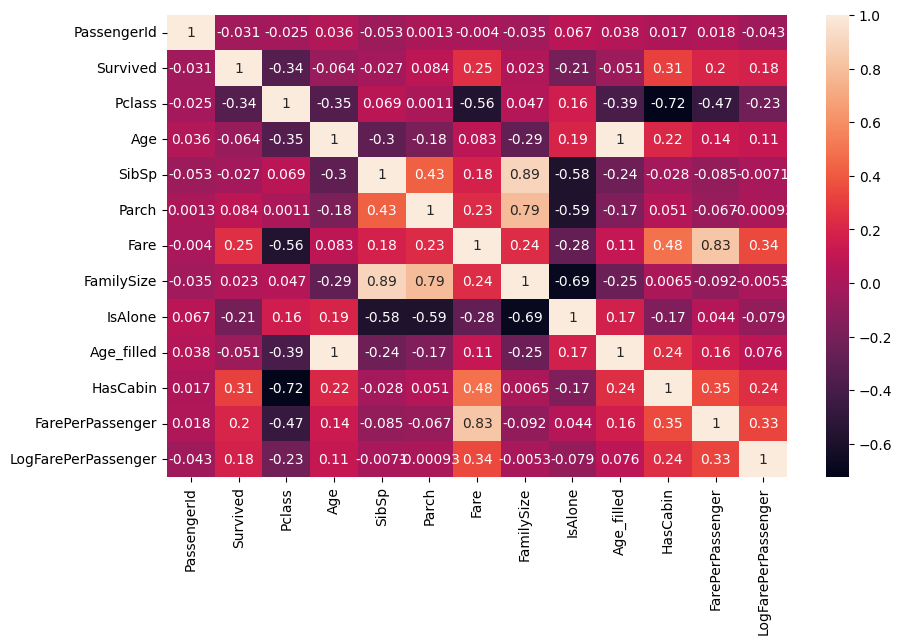

In [43]:
# Correlation
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(trainset_copy.corr(numeric_only = True), ax=ax, annot=True)
plt.show()

Remarks:

*   **Pclass** is negatively correlated with Fare (**-0.56**), LogFare (**-0.66**), and HasCabin (**-0.72**). This indicates that the lower the Pclass (i.e., the higher the class), the higher the fare and the more likely the passenger had a cabin.

* **SibSp and Parch** are negatively correlated with IsAlone, meaning that the more family members a passenger had, the less likely they were to be alone (which is intuitive).

* **Fare** has a strong positive correlation with both FarePerPassenger and LogFare.

* **Survived** is negatively correlated with Pclass (**-0.34**), and positively correlated with Fare (**0.25**) and HasCabin (**0.31**). This suggests that spending more on higher-class tickets and staying in a cabin increased the chance of survival.














In [ ]:
# Distribution
trainset_copy.hist(figsize=(12,12),bins=20)
plt.show()

### Categorical Data

In [ ]:
##Selecting numerical features
numerical_data = trainset_copy.select_dtypes(include='number')
#append the features of numerical_data to list
numerical_features=numerical_data.columns.tolist()

print(f'There are {len(numerical_features)} numerical features:', '\n')
print(numerical_features)

There are 13 numerical features: 

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'IsAlone', 'Age_filled', 'HasCabin', 'FarePerPassenger', 'LogFarePerPassenger']


In [ ]:
#Selecting categoricalfeatures
categorical_data = trainset_copy.drop(numerical_features, axis=1)
#append the features of categorical_data to list
categorical_features = categorical_data.columns.tolist()

print(f'There are {len(categorical_features)} categorical features:', '\n')
print(categorical_features)

There are 10 categorical features: 

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Title', 'Title_Bucketized', 'FamilySize_Bucketized', 'Age_Bucketized', 'LogFare_Bucketized']


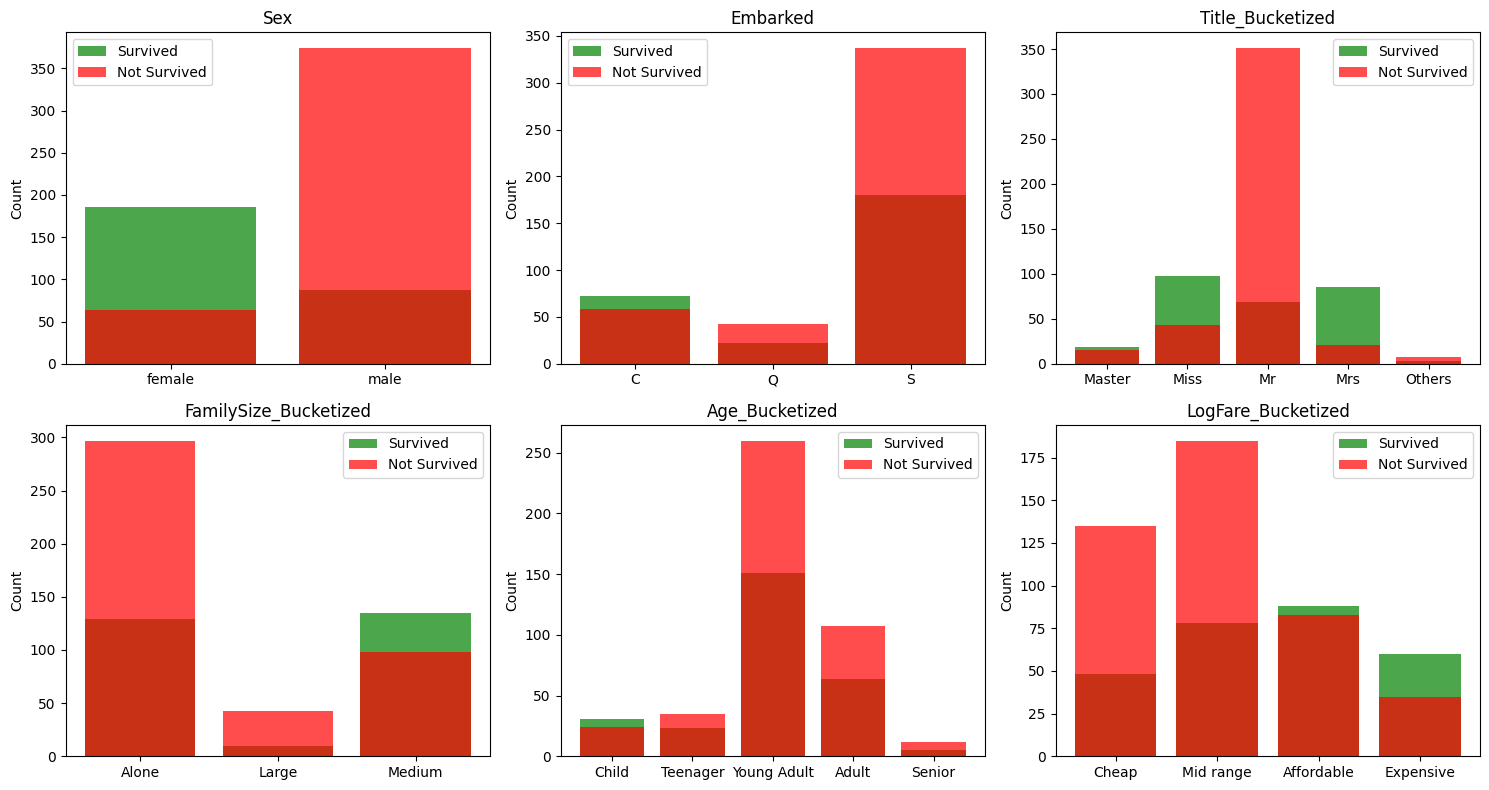

In [ ]:
import matplotlib.pyplot as plt

col = ['Sex', 'Embarked', 'Title_Bucketized',
       'FamilySize_Bucketized', 'Age_Bucketized', 'LogFare_Bucketized']

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for i, c in enumerate(col):
    grouped_data = trainset_copy.groupby([c, 'Survived'], observed=False).size().reset_index(name='Count')

    survived_data = grouped_data[grouped_data['Survived'] == 1]
    not_survived_data = grouped_data[grouped_data['Survived'] == 0]

    ax = axes[i]
    ax.bar(survived_data[c], survived_data['Count'], color='green', alpha=0.7, label='Survived')
    ax.bar(not_survived_data[c], not_survived_data['Count'], color='red', alpha=0.7, label='Not Survived')

    ax.set_title(c)
    ax.set_ylabel("Count")
    ax.legend()

plt.tight_layout();
plt.show();

## Data Preprocessing

**Remarks**
  - Add:  Title, FamilySize, IsAlone, HasCabin, FarePerPassenger
  - One-hot: Sex, Embarked, Title_Bucketized, FamilySize_Bucketized, IsAlone, HasCabin, Fare_Bucketized, Age_Bucketized
  - Imputer: Age (median) -> Age_filled, Embarked (most frequent)
  - Bucketize: Title, FamilySize, Age_filled, FarePerPassenger
  - Stratify Sampling: Survived, Sex, Pclass
  - Transform: Fare, FarePerPassenger (Log)

### Build preprocessing pipeline

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.utils.validation import check_array, check_is_fitted
from sklearn.pipeline import make_pipeline

In [ ]:
# Get feature name functions
def title_features(input_features=None, output_features=None):
    return ["Title"]

def family_size_features(input_features=None, output_features=None):
    if output_features is not None and len(output_features) == 1:
        return ["FamilySize"]
    return ["Fare", "FamilySize"]

def is_alone_features(input_features=None, output_features=None):
    return ["IsAlone"]

def has_cabin_features(input_features=None, output_features=None):
    return ["HasCabin"]

def fare_per_passenger_features(input_features=None, output_features=None):
    return ["FarePerPassenger"]

def log_features(input_features=None, output_features=None):
    return ["LogFarePerPassenger"]

def log_fare_features(input_features=None, output_features=None):
    return ["LogFare"]

def age_features(input_features=None, output_features=None):
    return ["Age"]

# Calculator_Transform functions
def divide_features(X: np.ndarray):
    return (X[:, 0] / X[:, 1])[:, np.newaxis]

def multiply_features(X: pd.DataFrame) -> pd.Series:
    if isinstance(X, pd.DataFrame):
        return ((X.iloc[:, 0] * X.iloc[:, 1]).to_numpy()).reshape(-1, 1)
    return (X[:, 0] * X[:, 1]).reshape(-1, 1)

def calculate_family_size(X) -> np.ndarray:
    if isinstance(X, pd.DataFrame):
        if "Fare" in X.columns:
            fare = X["Fare"].to_numpy()
            parch = X["Parch"].to_numpy()
            sibsp = X["SibSp"].to_numpy()
            family_size = parch + sibsp + 1
            return np.column_stack((fare, family_size))
        else:
            parch = X["Parch"].to_numpy()
            sibsp = X["SibSp"].to_numpy()
            family_size = parch + sibsp + 1
            return family_size.reshape(-1, 1)

    X = np.asarray(X)
    if X.ndim == 1:
        raise ValueError("X must be 2D.")

    if X.shape[1] == 3:
        fare = X[:, 0]
        parch = X[:, 1]
        sibsp = X[:, 2]
        family_size = parch + sibsp + 1
        return np.column_stack((fare, family_size))
    elif X.shape[1] == 2:
        parch = X[:, 0]
        sibsp = X[:, 1]
        family_size = parch + sibsp + 1
        return family_size.reshape(-1, 1)
    else:
        raise ValueError(f"Unexpected shape for X in calculate_family_size: {X.shape}")


def extract_title(X: pd.DataFrame) -> np.ndarray:
    titles = X["Name"].str.split(",", expand=True)[1].str.split(".", expand=True)[0].str.strip()
    return titles.to_numpy().reshape(-1, 1)

def bucketize_titles(X: np.ndarray) -> np.ndarray:
    X = pd.Series(X.ravel())
    known_titles = {"Mr", "Mrs", "Miss", "Master"}
    X = X.replace({
        'Dr': 'Mr', 'Sir': 'Mr',
        'Mlle': 'Miss', 'Ms': 'Miss',
        'Mme': 'Mrs'
    })
    X = X.apply(lambda title: title if title in known_titles else "Others")
    return X.to_numpy().reshape(-1, 1)

def calculate_is_alone(X: pd.DataFrame) -> np.ndarray:
    sibsp = X["SibSp"].to_numpy()
    parch = X["Parch"].to_numpy()
    is_alone = ((sibsp + parch) == 0).astype(int)
    return is_alone.reshape(-1, 1)

def calculate_cabin_presence(X: pd.DataFrame):
    return X.notna().astype(int).to_numpy()

# Custom BucketizeTransformer
class BucketizeTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, bins=None, labels=None):
        if bins and labels and len(bins) - 1 != len(labels):
            raise ValueError("Length of labels must match len(bins) - 1.")
        self.bins = bins
        self.labels = labels

    def fit(self, X, y=None):
        X = check_array(X, ensure_2d=False, dtype=None, accept_sparse=True)
        self.n_features_in_ = 1
        return self

    def transform(self, X):
        check_is_fitted(self, ["n_features_in_"])
        X = check_array(X, ensure_2d=False, dtype=None, accept_sparse=True).ravel()
        return pd.cut(X, bins=self.bins, labels=self.labels).to_numpy().reshape(-1, 1)

    def get_feature_names_out(self, input_features=None):
        return ["Bucketized"]

# Custom GroupMedianAgeImputer
class GroupMedianAgeImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        if not isinstance(X, pd.DataFrame):
            raise ValueError("X must be a pandas DataFrame.")
        if not all(col in X.columns for col in ['Pclass', 'Sex', 'Age']):
            raise ValueError("X must contain 'Pclass', 'Sex', and 'Age' columns.")
        self.median_ = (
            X[X['Age'].notna()]
            .groupby(['Pclass', 'Sex'])['Age']
            .median()
        )
        return self

    def transform(self, X):
        check_is_fitted(self, ["median_"])
        X = X.copy()
        def fill_age(row):
            if pd.isna(row['Age']):
                return self.median_.loc[row['Pclass'], row['Sex']]
            return row['Age']
        X['Age'] = X.apply(fill_age, axis=1)
        return X[['Age']]

    def get_feature_names_out(self, input_features=None):
        return ['Age']

# Pipelines
def title_pipeline():
    return make_pipeline(
        FunctionTransformer(extract_title, feature_names_out=title_features),
        FunctionTransformer(bucketize_titles, feature_names_out=title_features),
        OneHotEncoder()
    )

def family_size_pipeline(bins: list, labels: list):
    return make_pipeline(
        FunctionTransformer(calculate_family_size, feature_names_out=family_size_features),
        BucketizeTransformer(bins, labels),
        OneHotEncoder()
    )

def age_pipeline(bins: list, labels: list):
    return make_pipeline(
        GroupMedianAgeImputer(),
        FunctionTransformer(lambda x: x.round().astype(int), feature_names_out=age_features),
        BucketizeTransformer(bins, labels),
        OneHotEncoder()
    )

def embarked_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="most_frequent"),
        OneHotEncoder()
    )

def sex_pipeline():
    return make_pipeline(
        OneHotEncoder()
    )

def pclass_pipeline():
    return make_pipeline(
        OneHotEncoder()
    )

def fare_per_passenger_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(calculate_family_size, feature_names_out=family_size_features),
        FunctionTransformer(divide_features, feature_names_out=fare_per_passenger_features),
        FunctionTransformer(lambda x: np.log(x + 1e-6), feature_names_out=log_features)
    )

def log_fare_pipeline(bins: list, labels: list):
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(calculate_family_size, feature_names_out=family_size_features),
        FunctionTransformer(divide_features, feature_names_out=fare_per_passenger_features),
        FunctionTransformer(lambda x: np.log(x + 1e-6), feature_names_out=log_features),
        BucketizeTransformer(bins, labels),
        OneHotEncoder()
    )

def is_alone_pipeline():
    return make_pipeline(
        FunctionTransformer(calculate_is_alone, feature_names_out=is_alone_features),
        OneHotEncoder()
    )

def cabin_presence_pipeline():
    return make_pipeline(
        FunctionTransformer(calculate_cabin_presence, feature_names_out=has_cabin_features),
        OneHotEncoder()
    )

# ColumnTransformer
preprocessing = ColumnTransformer([
    ("FamilySize", family_size_pipeline(bins=[0, 1, 4, 11], labels=['Alone', 'Medium', 'Large']), ["Parch", "SibSp"]),
    ("Age", age_pipeline(bins=[-1, 12, 18, 35, 60, 81], labels=['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']), ["Pclass", "Sex", "Age"]),
    ("Embarked", embarked_pipeline(), ["Embarked"]),
    ("Sex", sex_pipeline(), ["Sex"]),
    ("Pclass", pclass_pipeline(), ["Pclass"]),
    ("FarePerPerson", fare_per_passenger_pipeline(), ["Fare", "Parch", "SibSp"]),
    ("LogFare", log_fare_pipeline(bins=[-15, 2, 2.5, 3.5, 7], labels=['Cheap', 'Mid range', 'Affordable', 'Expensive']), ["Fare", "Parch", "SibSp"]),
    ("HasCabin", cabin_presence_pipeline(), ["Cabin"]),
    ("IsAlone", is_alone_pipeline(), ["Parch", "SibSp"]),
    ("Title", title_pipeline(), ["Name"])
], sparse_threshold=0)

In [ ]:
print("Type of preprocessing: ",type(preprocessing), end="\n\n")
preprocessing

Type of preprocessing:  <class 'sklearn.compose._column_transformer.ColumnTransformer'>



,transformers,"[('FamilySize', ...), ('Age', ...), ...]"
,remainder,'drop'
,sparse_threshold,0
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,func,<function cal...001E2A8733D80>
,inverse_func,None
,validate,False


### Apply preprocessing pipeline to data

In [ ]:
# The dataframe needed applying preprocessing
X_train = strat_train_set.drop(["Survived"], axis=1)
y_train = strat_train_set["Survived"]

X_test = strat_test_set.drop(["Survived"], axis=1)
y_test = strat_test_set["Survived"]

In [ ]:
# Fit preprocessing to dataframe training set (X_train)
print("Type of training set before prepared: ", type(X_train))
print("Shape of training set before prepared: ", X_train.shape, end="\n\n")

X_train_preprocessed = preprocessing.fit_transform(X_train)
print("Type of training set after prepared: ", type(X_train_preprocessed))
print("Shape of training set after prepared: ", X_train_preprocessed.shape, end="\n\n")

print("Columns' names after prepared: \n", preprocessing.get_feature_names_out(), end="\n\n")
print("The first entry after prepared (row 0): \n", X_train_preprocessed[:1])

Type of training set before prepared:  <class 'pandas.core.frame.DataFrame'>
Shape of training set before prepared:  (712, 11)

Type of training set after prepared:  <class 'numpy.ndarray'>
Shape of training set after prepared:  (712, 30)

Columns' names after prepared: 
 ['FamilySize__Bucketized_Alone' 'FamilySize__Bucketized_Large'
 'FamilySize__Bucketized_Medium' 'Age__Bucketized_Adult'
 'Age__Bucketized_Child' 'Age__Bucketized_Senior'
 'Age__Bucketized_Teenager' 'Age__Bucketized_Young Adult'
 'Embarked__Embarked_C' 'Embarked__Embarked_Q' 'Embarked__Embarked_S'
 'Sex__Sex_female' 'Sex__Sex_male' 'Pclass__Pclass_1' 'Pclass__Pclass_2'
 'Pclass__Pclass_3' 'FarePerPerson__LogFarePerPassenger'
 'LogFare__Bucketized_Affordable' 'LogFare__Bucketized_Cheap'
 'LogFare__Bucketized_Expensive' 'LogFare__Bucketized_Mid range'
 'HasCabin__HasCabin_0' 'HasCabin__HasCabin_1' 'IsAlone__IsAlone_0'
 'IsAlone__IsAlone_1' 'Title__Title_Master' 'Title__Title_Miss'
 'Title__Title_Mr' 'Title__Title_Mrs' 'T

### Model Selection and Fine tune

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.gaussian_process.kernels import RBF, DotProduct, Matern
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, recall_score, f1_score, make_scorer
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform

#### Some models without **Fine tune**

In [ ]:
# Model initialization
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=123),
    'Random Forest': RandomForestClassifier(random_state=123),
    'SVM': SVC(probability=True, random_state=123),
    'KNN': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', verbosity=0, random_state=123),
    'Gradient Boosting': GradientBoostingClassifier(random_state=123),
    'Gaussian Process': GaussianProcessClassifier(kernel=RBF(), random_state=123)
}

# Cross-validation setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validation loop
for name, model in models.items():
    acc_scores = cross_val_score(model, X_train_preprocessed, y_train, cv=cv, scoring='accuracy')
    rec_scores = cross_val_score(model, X_train_preprocessed, y_train, cv=cv, scoring='recall')
    f1_scores  = cross_val_score(model, X_train_preprocessed, y_train, cv=cv, scoring='f1')

    print(f"\n{name}:")
    print(f"  🔹 Accuracy: {acc_scores.mean():.4f} ± {acc_scores.std():.4f}")
    print(f"  🔹 Recall:   {rec_scores.mean():.4f} ± {rec_scores.std():.4f}")
    print(f"  🔹 F1-score: {f1_scores.mean():.4f} ± {f1_scores.std():.4f}")


Logistic Regression:
  🔹 Accuracy: 0.8343 ± 0.0250
  🔹 Recall:   0.7557 ± 0.0501
  🔹 F1-score: 0.7780 ± 0.0345

Random Forest:
  🔹 Accuracy: 0.7921 ± 0.0211
  🔹 Recall:   0.7301 ± 0.0537
  🔹 F1-score: 0.7295 ± 0.0281

SVM:
  🔹 Accuracy: 0.8329 ± 0.0213
  🔹 Recall:   0.7265 ± 0.0531
  🔹 F1-score: 0.7695 ± 0.0306

KNN:
  🔹 Accuracy: 0.8090 ± 0.0261
  🔹 Recall:   0.7084 ± 0.0575
  🔹 F1-score: 0.7403 ± 0.0326

XGBoost:
  🔹 Accuracy: 0.8033 ± 0.0294
  🔹 Recall:   0.7154 ± 0.0463
  🔹 F1-score: 0.7378 ± 0.0247

Gradient Boosting:
  🔹 Accuracy: 0.8118 ± 0.0173
  🔹 Recall:   0.7264 ± 0.0570
  🔹 F1-score: 0.7477 ± 0.0204

Gaussian Process:
  🔹 Accuracy: 0.8203 ± 0.0268
  🔹 Recall:   0.7046 ± 0.1020
  🔹 F1-score: 0.7475 ± 0.0550


**Comment**

The three most effective models are **Logistic Regression, SVM, and Gaussian Process**. These are considered promising models that are likely to yield even better results after fine-tuning.

#### PCA - The method for dataset has a myriad of features

---

This is an optional step to explore whether PCA could help, since the dataset has many numerical features. Using PCA is not required, and the following steps may continue with the original data if needed.

In [ ]:
# We will apply PCA for X_train_preprocessed, so let's glance this dataframe
pd.DataFrame(X_train_preprocessed, columns=preprocessing.get_feature_names_out()).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 30 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   FamilySize__Bucketized_Alone        712 non-null    float64
 1   FamilySize__Bucketized_Large        712 non-null    float64
 2   FamilySize__Bucketized_Medium       712 non-null    float64
 3   Age__Bucketized_Adult               712 non-null    float64
 4   Age__Bucketized_Child               712 non-null    float64
 5   Age__Bucketized_Senior              712 non-null    float64
 6   Age__Bucketized_Teenager            712 non-null    float64
 7   Age__Bucketized_Young Adult         712 non-null    float64
 8   Embarked__Embarked_C                712 non-null    float64
 9   Embarked__Embarked_Q                712 non-null    float64
 10  Embarked__Embarked_S                712 non-null    float64
 11  Sex__Sex_female                     712 non-n

Tỉ lệ phương sai giải thích của từng PC:
 [0.20071208 0.14075124 0.0998168  0.07711513 0.06489136 0.05294844
 0.04939503 0.04337927 0.04041163 0.0351211  0.03426495 0.03147746
 0.0301349  0.02622311 0.02569486]
Tổng: 0.9523373605718229



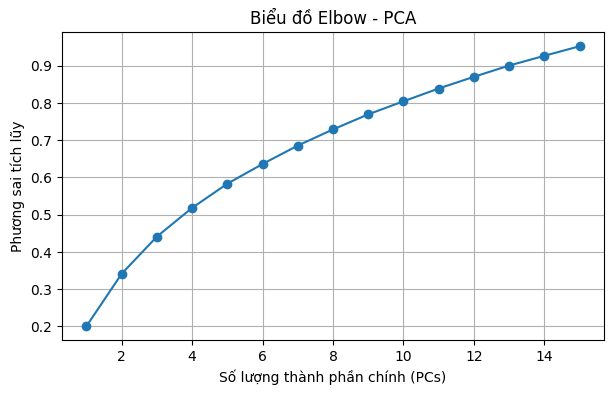

In [ ]:
# And now, Excuting PCA

# Standardizing data on the train _ The reason for standardization is needed to be related to the covariance
scaler = StandardScaler()
X_train_preprocessed_scaled = scaler.fit_transform(X_train_preprocessed)

# Apply PCA
pca = PCA(n_components = 15) # Why apply 15 PCs? See "Tổng" or the plot below _ it got >95% information
X_train_preprocessed_pca = pca.fit_transform(X_train_preprocessed_scaled) # Now X_PCA is a new data that has decreased in dimensions

# Information PCA
explained_variance = pca.explained_variance_ratio_
print("Tỉ lệ phương sai giải thích của từng PC:\n", explained_variance)
print("Tổng:", explained_variance.sum(), end="\n\n")

# Draw a chart of accumulated variance
plt.figure(figsize=(7, 4))
plt.plot(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), marker='o')
plt.xlabel('Số lượng thành phần chính (PCs)')
plt.ylabel('Phương sai tích lũy')
plt.title('Biểu đồ Elbow - PCA')
plt.grid(True)
plt.show()

In [ ]:
# Now, we will train those models with the PCA data
print("\n=== Evaluate the models by cross-validation (5-fold) ===")
for name, model in models.items():
    acc_scores = cross_val_score(model, X_train_preprocessed_pca, y_train, cv=cv, scoring='accuracy')
    rec_scores = cross_val_score(model, X_train_preprocessed_pca, y_train, cv=cv, scoring='recall')
    f1_scores  = cross_val_score(model, X_train_preprocessed_pca, y_train, cv=cv, scoring='f1')

    print(f"\n{name}:")
    print(f"  🔹 Accuracy: {acc_scores.mean():.4f} ± {acc_scores.std():.4f}")
    print(f"  🔹 Recall:   {rec_scores.mean():.4f} ± {rec_scores.std():.4f}")
    print(f"  🔹 F1-score: {f1_scores.mean():.4f} ± {f1_scores.std():.4f}")


=== Evaluate the models by cross-validation (5-fold) ===

Logistic Regression:
  🔹 Accuracy: 0.8301 ± 0.0287
  🔹 Recall:   0.7375 ± 0.0688
  🔹 F1-score: 0.7686 ± 0.0438

Random Forest:
  🔹 Accuracy: 0.7936 ± 0.0190
  🔹 Recall:   0.7264 ± 0.0495
  🔹 F1-score: 0.7298 ± 0.0275

SVM:
  🔹 Accuracy: 0.8175 ± 0.0354
  🔹 Recall:   0.7157 ± 0.0931
  🔹 F1-score: 0.7492 ± 0.0539

KNN:
  🔹 Accuracy: 0.8287 ± 0.0363
  🔹 Recall:   0.7158 ± 0.0695
  🔹 F1-score: 0.7621 ± 0.0502

XGBoost:
  🔹 Accuracy: 0.7865 ± 0.0223
  🔹 Recall:   0.7190 ± 0.0336
  🔹 F1-score: 0.7219 ± 0.0224

Gradient Boosting:
  🔹 Accuracy: 0.8090 ± 0.0250
  🔹 Recall:   0.7229 ± 0.0666
  🔹 F1-score: 0.7436 ± 0.0348

Gaussian Process:
  🔹 Accuracy: 0.8245 ± 0.0261
  🔹 Recall:   0.7265 ± 0.0832
  🔹 F1-score: 0.7594 ± 0.0432


**Comment**
Therefore, dimensionality reduction using PCA is not always applicable. Specifically:

- We were clearly able to reduce the number of features from 30 to just 15—a significant reduction—while still retaining 95% of the original information.

- However, it's important to consider that the model's performance metrics were slightly lower after dimensionality reduction.

=> That said, this remains a perspective worth revisiting—if future preprocessing yields higher-quality features and stronger baseline accuracy. In that case, PCA could help reduce training time with minimal performance loss.

---

Given that the ***current highest accuracy (~83%)*** is still not satisfactory, the original dataset will be used in the next steps.

#### Models after Fine tune

---
After obtaining the results before fine-tuning and applying PCA, we decided to retain only the most promising models: Logistic Regression, SVM, and Gaussian Process

In [ ]:
# 1. Logistic Regression
param_grid_lr = {
    'penalty': ['l2'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear']
}
lr = LogisticRegression(max_iter=1000, random_state=42)
grid_lr = GridSearchCV(lr, param_grid=param_grid_lr, cv=cv, scoring='accuracy', n_jobs=-1)
grid_lr.fit(X_train_preprocessed, y_train)
best_lr_model = grid_lr.best_estimator_

# 2. Support Vector Machine (SVM)
param_grid_svm = {
    'C': [0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}
svm = SVC(random_state=42)
grid_svm = GridSearchCV(svm, param_grid=param_grid_svm, cv=cv, scoring='accuracy', n_jobs=-1)
grid_svm.fit(X_train_preprocessed, y_train)
best_svm_model = grid_svm.best_estimator_

# 3. Gaussian Process
param_grid_gpc = {
    'kernel': [1.0 * RBF(), DotProduct(), Matern()]
}
gpc = GaussianProcessClassifier(random_state=42)
grid_gpc = GridSearchCV(gpc, param_grid=param_grid_gpc, cv=cv, scoring='accuracy', n_jobs=-1)
grid_gpc.fit(X_train_preprocessed, y_train)
best_gpc_model = grid_gpc.best_estimator_

In [ ]:
# Model initialization again
models = {
    'Logistic Regression': best_lr_model,
    'Support Vector Machine': best_svm_model,
    'Gaussian Process': best_gpc_model
}

# Cross-validation setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validation loop
for name, model in models.items():
    acc_scores = cross_val_score(model, X_train_preprocessed_pca, y_train, cv=cv, scoring='accuracy')
    rec_scores = cross_val_score(model, X_train_preprocessed_pca, y_train, cv=cv, scoring='recall')
    f1_scores  = cross_val_score(model, X_train_preprocessed_pca, y_train, cv=cv, scoring='f1')

    print(f"\n{name}:")
    print(f"  🔹 Accuracy: {acc_scores.mean():.4f} ± {acc_scores.std():.4f}")
    print(f"  🔹 Recall:   {rec_scores.mean():.4f} ± {rec_scores.std():.4f}")
    print(f"  🔹 F1-score: {f1_scores.mean():.4f} ± {f1_scores.std():.4f}")


Logistic Regression:
  🔹 Accuracy: 0.8301 ± 0.0287
  🔹 Recall:   0.7375 ± 0.0688
  🔹 F1-score: 0.7686 ± 0.0438

Support Vector Machine:
  🔹 Accuracy: 0.8175 ± 0.0354
  🔹 Recall:   0.7157 ± 0.0931
  🔹 F1-score: 0.7492 ± 0.0539

Gaussian Process:
  🔹 Accuracy: 0.8329 ± 0.0273
  🔹 Recall:   0.7448 ± 0.0730
  🔹 F1-score: 0.7730 ± 0.0435


**Comment**

- The cross-validation results show that **Gaussian Process** slightly outperforms **Logistic Regression** in terms of mean accuracy, recall and F1-score. Although the improvements are modest, they are consistent across metrics.
- Since the dataset is relatively small, the higher computational cost of Gaussian Process is not a critical issue. In this setting, we prioritize predictive performance over model simplicity and interpretability.

=> Chosen model: **Gaussian Process**

## Actual evaluation on real Test set

In [ ]:
titanic_test = pd.read_csv("../dataset/test.csv")

X_test_preprocessed = preprocessing.transform(titanic_test)
y_test_pred = best_gpc_model.predict(X_test_preprocessed)

submission = pd.DataFrame({
    "PassengerId": titanic_test["PassengerId"],
    "Survived": y_test_pred
})
submission.to_csv("../output/submission.csv", index=False)
print("Done!")

Done!
